In [27]:
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from utils import io
from utils import ts_utils
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller, pacf


1 stationary True
Fitting (0, 1, 0) for exog_Revenue_Index
Fitting (0, 1, 1) for exog_Revenue_Index
Fitting (0, 1, 2) for exog_Revenue_Index
1 stationary False
2 stationary False
3 stationary False
Fitting (0, 3, 0) for exog_EBIT_Index
Fitting (0, 3, 1) for exog_EBIT_Index
Fitting (0, 3, 2) for exog_EBIT_Index
1 stationary False
2 stationary False
3 stationary False
Fitting (0, 3, 0) for exog_MGDP_Index
Fitting (0, 3, 1) for exog_MGDP_Index
Fitting (0, 3, 2) for exog_MGDP_Index
1 stationary True
Fitting (0, 1, 0) for Service 0
Fitting (0, 1, 1) for Service 0
Fitting (0, 1, 2) for Service 0


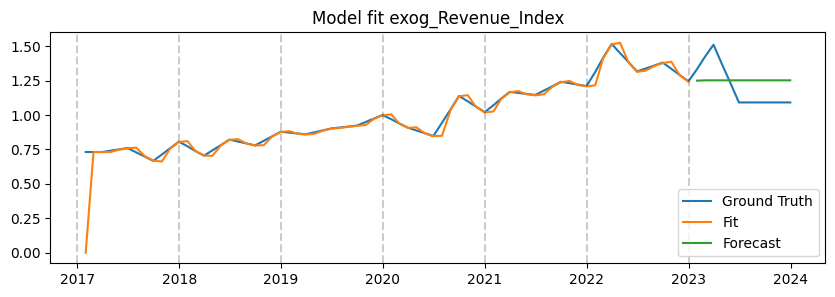

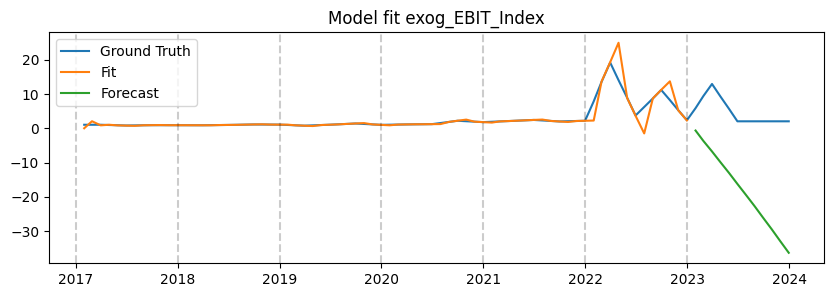

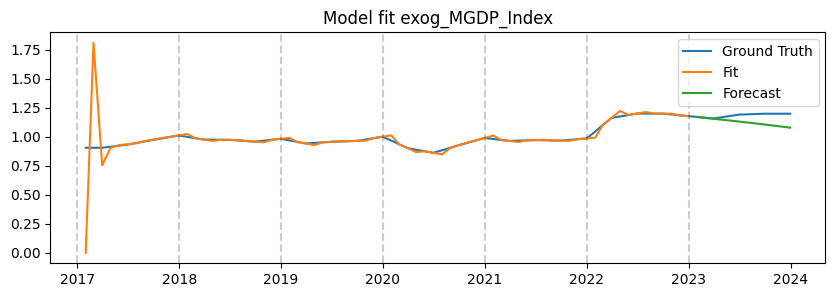

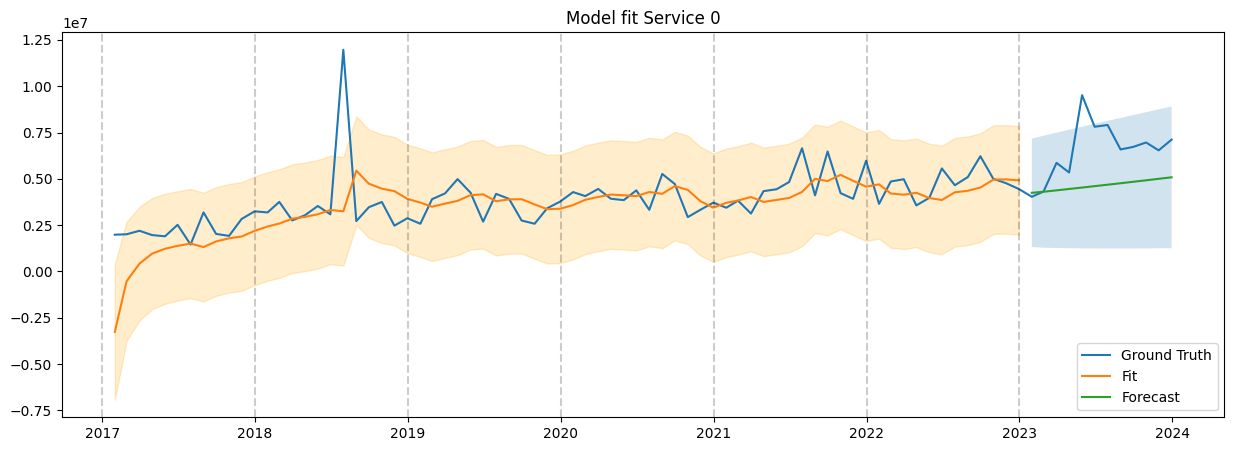

In [32]:
import warnings
warnings.filterwarnings('ignore')

importlib.reload(io)
importlib.reload(ts_utils)
data_handler = io.DataHandler(data_path = 'data')

bs_areas = data_handler.get_bussines_areas()
# bs_areas = ['EQ']

regions = data_handler.get_regions()
# regions = [33]

for bs_area in bs_areas:
    for region in regions: 
        
        name = f'{bs_area}_{region}'
        full_name = f'{bs_area} {region}'

        sales_bus_region = data_handler.get_sales_per_business_area_and_region(business_area = bs_area,
                                                                               region = region)
        
        sales_bus_region = data_handler.add_monthly_financial_info(sales_df = sales_bus_region,
                                                                   region = region)

        ts_handler = ts_utils.TimeSeriesHandler(name = full_name,
                                                df = sales_bus_region,
                                                # endog = 'sales_value')
                                                endog = 'sales_value', exog = ['MGDP_Index', 'EBIT_Index', 'Revenue_Index'])
        
        exog_forecast = pd.DataFrame()
        for exog in ts_handler.exog[::-1]:
            exog_name = f'exog_{exog}'
            exog_ts_handler = ts_utils.TimeSeriesHandler(name = exog_name,
                                                         df = sales_bus_region,
                                                         endog = exog,
                                                         exog = None)
            exog_ts_handler.determine_orders()
            exog_ts_handler.fit_sarimax_exog(plot = True)
            exog_forecast[exog] = exog_ts_handler.forecast
        
        ts_handler.set_exog_forecast(exog_forecast)
        
        ts_handler.determine_orders()

        ts_handler.fit_sarimax(name = full_name,
                               plot_fit = True,
                               plot_prediction = True,
                               rolling_prediction = True,
                               plot_rolling = True)
        
        
        break
    break
